In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from intESN import intESN

In [4]:
# dataset

domain = np.arange(1024)

sine = np.sin(0.1 * domain)
square = signal.square(0.1 * domain)

X_train = np.zeros([2, domain.size, 1])
X_train[0] = sine.reshape([domain.size, 1])
X_train[1] = square.reshape([domain.size, 1])

y_train = np.arange(2)

print(y_train)

[0 1]


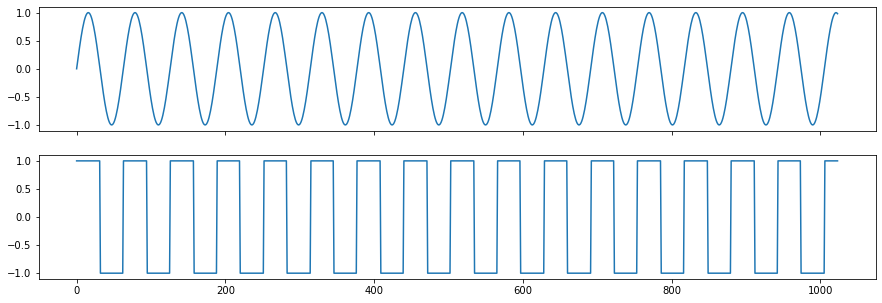

In [5]:
# plot data

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,5), sharex=True)
ax1.plot(domain, sine)
ax2.plot(domain, square)

plt.show()

In [2]:
# setup

# dimensnions
# K: inputs , N: neurons, L: outputs
K = 1
N = 100
L = 1

# quantization
sensitivity = 200
levels = np.linspace(-1.2, 1.2, sensitivity)
ref_vectors = np.array([np.random.choice([-1.0, 0.0, 1.0], size=N) for i in range(2)])

def quantize(value):
    level = np.digitize(value, levels)
    section = int(level / float(sensitivity) * N)
    return np.append(ref_vectors[0][:section], ref_vectors[1][section:])

model = intESN(N, K, L, quantize, clip=3)

NameError: name 'np' is not defined

In [1]:
# train

model.fit(X_train, y_train, task='classification')

NameError: name 'model' is not defined

In [6]:
# test
sig = np.cos(0.1 * domain + 20)
pred = model.classify(sig, np.array([0]))

1.0


In [7]:
# display results

print(pred)

[0]


In [36]:
# test

model.softmax(X_train, np.array([0, 1]))

0.676986926618
0.250386075861
0.141221692631
0.0980961741281
0.0746959129089
0.0601484257121
0.0502773609384
0.0431601086593
0.0377949421178
0.0336108722122
0.0302594782365
0.0275164770666
0.0252311435628
0.0232985348443
0.021643386315
0.0202103428657
0.0189578018892
0.0178539032958
0.0168738425011
0.01599802452
0.0152107677011
0.0144993754708
0.0138534598784
0.0132644408105
0.01272516993
0.0122296445913
0.0117727876096
0.0113502758747
0.0109584056355
0.0105939856276
0.0102542515612
0.00993679715447
0.0096395180988
0.00936056621464
0.00909831170268
0.00885131187135
0.00861828508194
0.00839808892405
0.00818970184211
0.00799220759313
0.00780478203995
0.00762668188095
0.00745723499316
0.00729583212582
0.00714191972927
0.00699499374236
0.0068545941922
0.00672030048528
0.00659172728862
0.00646852091691
0.0063503561543
0.00623693345129
0.00612797644606
0.00602322976726
0.00592245708173
0.00582543935587
0.00573197330397
0.00564187000037
0.00555495363571
0.0054710604001
0.00539003747837
0.0053

In [37]:
# test
# sig = np.cos(0.1 * domain + 20)
pred = model.predict(X_train, np.array([0, 1]))
print(pred)

3.02331715101
[[ 2.71486765 -3.09810305]
 [-3.06594109  2.73113738]]
